In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import uproot,glob


plt.rcParams["figure.figsize"] = (10, 8)

In [262]:
def get_df(filename,nevents=1e17):
    with open(filename, "r") as f:
        d={"Q2":[], "x":[], "pT1":[], "pT2":[], "y1":[], "y2":[], "z1":[], "z2":[], "phi1":[], "phi2":[],
          "p1":[], "p2":[], "thetalab1":[], "thetalab2":[],"philab1":[], "philab2":[],}
        d_lead={"Q2":[], "x":[], "pT1":[], "y1":[], "z1":[], "phi1":[],
          "p1":[],  "thetalab1":[],"philab1":[],}
        pT2s=[]
        phi2s=[]
        y2s=[]
        z2s=[]
        p2s=[]
        thetalab2s=[]
        philab22s=[]
        foundLeading=False
        events=0
        while True:
            line=f.readline()
            if line is not None:
                s=line.split()
            else : break
            if events>events:
                break
            if len(s)==0:
                break
            if s[0]=='#':
                nh2=len(pT2s)
                if foundLeading==True:
                    
                    d_lead['Q2'].append(Q2)
                    d_lead['x'].append(x)
                    d_lead['pT1'].append(pT1)
                    d_lead['y1'].append(y1)
                    d_lead['z1'].append(z1)
                    d_lead['p1'].append(p1)
                    d_lead['thetalab1'].append(thetalab1)
                    d_lead['philab1'].append(philab1)
                    d_lead['phi1'].append(phi1)
                    if nh2 >0:
                        d['Q2']+=[Q2]*nh2
                        d['x']+=[x]*nh2
                        d['pT1']+=[pT1]*nh2
                        d['y1']+=[y1]*nh2
                        d['z1']+=[z1]*nh2
                        d['p1']+=[p1]*nh2
                        d['thetalab1']+=[thetalab1]*nh2
                        d['philab1']+=[philab1]*nh2
                        d['phi1']+=[phi1]*nh2
                        d['pT2']+=pT2s
                        d['y2']+=y2s
                        d['z2']+=z2s
                        d['phi2']+=phi2s
                        d['p2']+=p2s
                        d['philab2']+=philab2s
                        d['thetalab2']+=thetalab2s
                    foundLeading=False

                Q2=float(s[1])
                x=float(s[2])
                
                #reset
                pT2s=[]
                phi2s=[]
                y2s=[]
                z2s=[]
                p2s=[]
                thetalab2s=[]
                philab2s=[]
                foundLeading=False
                events+=1
                
                    
            elif s[0]=="211" and float(s[1])>0.5: #leading pi+
                z1=float(s[1])
                pT1=float(s[2])
                phi1=float(s[3])
                y1=float(s[4])
                p1=float(s[5])
                thetalab1=np.pi-float(s[6])
                philab1=float(s[7])
                foundLeading=True
            elif s[0]=="-211" and float(s[1])<0.5: #subleading pi-
                z2s.append(float(s[1]))
                pT2s.append(float(s[2]))
                phi2s.append(float(s[3]))
                y2s.append(float(s[4]))
                p2s.append(float(s[5]))
                thetalab2s.append(np.pi-float(s[6]))
                philab2s.append(float(s[7]))
    return pd.DataFrame(d), pd.DataFrame(d_lead)
            
                

In [301]:
events={}; events_lead={}
A='D'

for kT in 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2:
    #use the most recent version of the sim.
    cands=glob.glob(f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/e{A}_{kT:.2f}/*.dat")
    import os
    cands=sorted(cands, key=os.path.getmtime)
    print(cands)
    if len(cands) ==0:
        continue
    events[('kT',kT)],  events_lead[('kT',kT)]= get_df(cands[-1],1000)
    print(f"parsed {('kT',kT)}, {len(events[('kT',kT)])} pairs, {len(events_lead[('kT',kT)])} leading")

['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_0.40/1253816.dat']
parsed ('kT', 0.4), 1534 pairs, 3576 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_0.60/1253825.dat']
parsed ('kT', 0.6), 1440 pairs, 3621 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_0.80/1253834.dat']
parsed ('kT', 0.8), 1543 pairs, 3718 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_1.00/1253843.dat']
parsed ('kT', 1.0), 1961 pairs, 4009 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_1.20/1253852.dat']
parsed ('kT', 1.2), 1904 pairs, 3916 leading
['/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_kTsoft/eD_1.40/1253861.dat']
parsed ('kT', 1.4), 1977 pairs, 4103 leading
[]
[]
[]
[]


In [302]:
#for pT in np.linspace(0.3, 0.8, 11):
for pT in np.linspace(0.8, 1.6, 9):
    #use the most recent version of the sim.
    cands=glob.glob(f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak_pT/e{A}_{pT:.2f}/*.dat")
    import os
    cands=sorted(cands, key=os.path.getmtime)
    print(cands)
    if len(cands)==0:
        continue
    events[('pT',pT)],  events_lead[('pT',pT)]= get_df(cands[-1],1000)
    print(f"parsed {('pT',pT)}, {len(events[('pT',pT)])} pairs, {len(events_lead[('pT',pT)])} leading")

[]
[]
[]
[]
[]
[]
[]
[]
[]


In [303]:
def process(df):
    pi=np.pi
    df['dphi']=df.eval(f"phi1-phi2-(phi1-phi2>{np.pi})*{2*pi}+(phi1-phi2<-{np.pi})*{2*np.pi}")
    df['dy']=df.eval("y1-y2")
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")
def process_lead(df):
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")

In [304]:
for key in events:
    process(events[key])
    process_lead(events_lead[key])

In [305]:
deg=np.pi/180
#all_data['all'][0]['D'].C
def getPrediction(q_add=None, q_add_lead=None):
    q=f"pT1>0.25 and pT2>0.25 and Q2>1 and nu>2.2 and nu<4.2 and thetalab1>10*{deg} and W>2"
    q+=f" and ((thetalab2>25*{deg} and p2>0.7) or (thetalab2>30*{deg} and p2>0.5) or (thetalab2>40*{deg} and p2>0.35))"
    q+=f" and z2>0.05 and z2<0.45 and z1>0.5"
    q_lead=f"pT1>0.25 and Q2>1 and nu>2.2 and nu<4.2 and W>2"
    if q_add is not None:
        q+= " and " + q_add
    if q_add_lead is not None:
        q_lead+= " and " + q_add_lead
        
    colors='tab:red tab:blue tab:orange tab:green'.split()
    results={}
    for i,key in enumerate(events.keys()):
        #plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
        #         label=A, color=colors[i])
        y,x=np.histogram(abs(events[key].query(q).dphi), bins=np.linspace(0,np.pi, 9))
        bc=(x[1:]+x[:-1])/2
        n_lead=len(events_lead[key].query(q_lead))
        
        C=y/n_lead
        dCstat = np.sqrt(y)/n_lead
        phi=bc
        phi_low=x[:-1]
        phi_up=x[1:]

        width=np.sqrt(np.sum(y*(bc-np.pi)**2)/np.sum(y))
        dwidth=np.sqrt(sum(dCstat**2*(((phi-np.pi)**2-width**2)/sum(C))**2))/(2*width)
        print(key, width, dwidth)
        
        bc=list(bc)+list(reversed(np.pi*2-bc))
        y=np.array(list(y)+list(reversed(y)))

        
        plt.fill_between(bc, (y-np.sqrt(y))/n_lead,  (y+np.sqrt(y))/n_lead,label=f'{key[0]}={key[1]:.2f} GeV', alpha=0.5)
        results[key]=width, dwidth#pd.DataFrame({'C':C, 'dCstat':dCstat, "phi":phi,"phi_low":phi_low, "phi_up": phi_up})
        #results[kT]['R'] = results[kT]['C']/results['D']['C']
        #results[kT]['dRstat'] = results[kT]['R']*np.hypot(results[kT]['dCstat']/results[kT]['C'],results['D']['dCstat']/results['D']['C'])
    plt.legend()
    plt.show()
    return results
all_eHIJING={}

('kT', 0.4) 0.967535889840345 0.056364133113984645
('kT', 0.6) 1.008568207211516 0.06175939507795702
('kT', 0.8) 1.0014114222191897 0.06178256285355047
('kT', 1.0) 0.9795011390501488 0.06906706285222633
('kT', 1.2) 1.092089789554033 0.07397646504206197
('kT', 1.4) 0.9230394881805459 0.0637202753312249


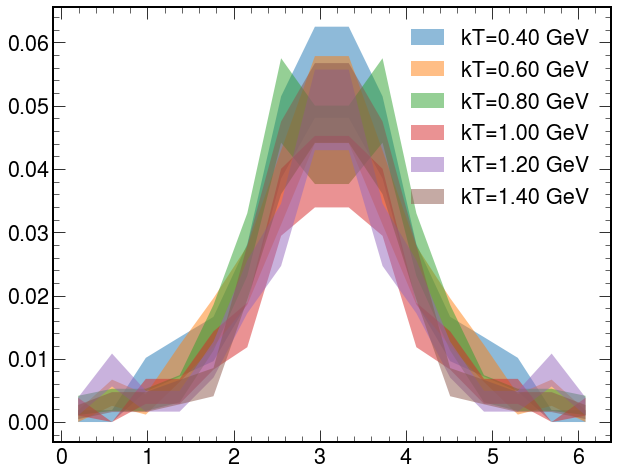

In [306]:
all_eHIJING['all']=[getPrediction()]

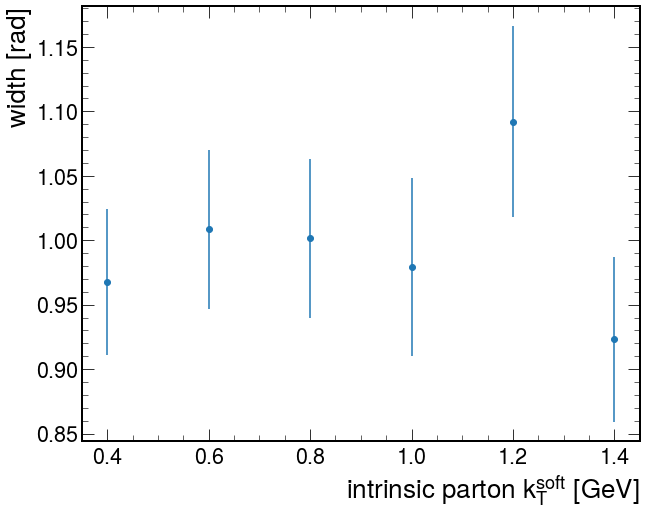

In [308]:
d=all_eHIJING['all'][0]
x,y,dy=[],[],[]
for key in d:
    if key[0] =='kT':
        x.append(key[1])
        y.append(d[key][0])
        dy.append(d[key][1])
plt.errorbar(x,y, dy, ls='', marker='o')
plt.xlabel("intrinsic parton $k^{\\rm soft}_T$ [GeV]")
plt.ylabel("width [rad]")
plt.show()

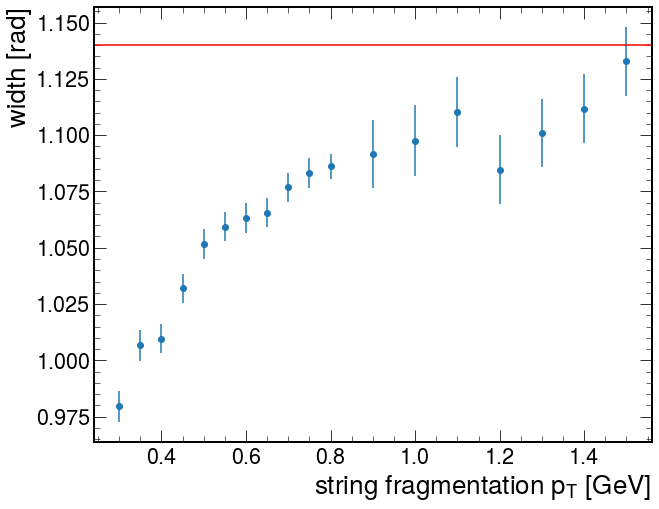

In [235]:
x,y,dy=[],[],[]
for key in d:
    if key[0] =='pT':
        x.append(key[1])
        y.append(d[key][0])
        dy.append(d[key][1])
plt.errorbar(x,y, dy, ls='', marker='o')
plt.xlabel("string fragmentation $p_T$ [GeV]")
plt.ylabel("width [rad]")
plt.axhline(1.14, color='r')
#plt.axvline(0.35)
#plt.axvline(0.5)
#plt.axvline(0.65)
plt.show()

dY bins
('kT', 0.4) 0.6679921983836786 0.08977518396032495
('kT', 0.45) 0.5833853648407237 0.07436692668829764
('kT', 0.5) 0.6663534221427055 0.06868302544687564
('kT', 0.55) 0.8807910177654866 0.07584500011155694
('kT', 0.6000000000000001) 0.5984916359291538 0.08463784128967719
('kT', 0.65) 0.6784828493202107 0.08137312376868777
('kT', 0.7000000000000001) 0.6596284191438682 0.07495877000746767
('kT', 0.75) 0.6151740514945303 0.0698589059737682
('kT', 0.8) 0.7691244176913866 0.06860307723340658
('pT', 0.3) 0.5853928032183705 0.030618216029673306
('pT', 0.35) 0.6762264011283021 0.02849504761734895
('pT', 0.4) 0.5925410340814634 0.026465804684902762
('pT', 0.45) 0.5737975619043475 0.02445955577146839
('pT', 0.5) 0.6628668204669556 0.02476275846902847
('pT', 0.55) 0.6394247655562693 0.0238875072325363
('pT', 0.6000000000000001) 0.6474219904105304 0.023734614753439538
('pT', 0.65) 0.6351470547147717 0.023522806885639416
('pT', 0.7) 0.6254556833607384 0.023940936202957043
('pT', 0.75) 0.643

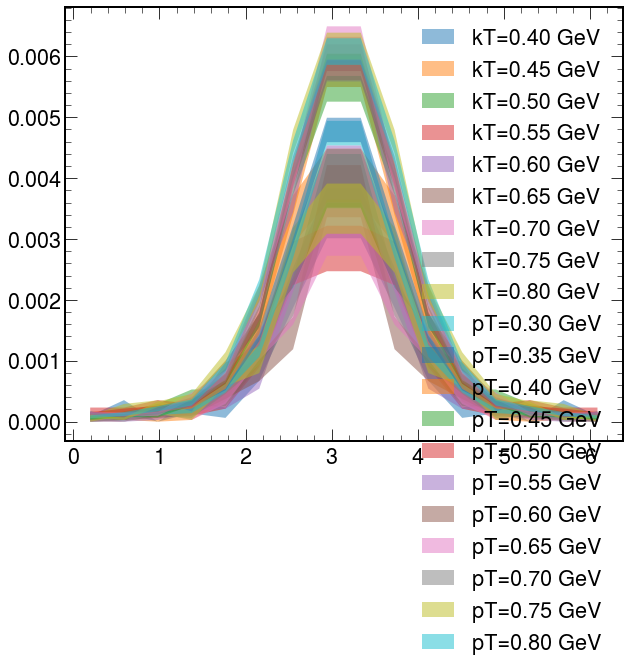

('kT', 0.4) 1.026002088638038 0.023322293189334636
('kT', 0.45) 0.9026715018449071 0.024354053586293778
('kT', 0.5) 0.9200169274833931 0.023480263641278296
('kT', 0.55) 0.9839023264571151 0.023485859290641436
('kT', 0.6000000000000001) 1.0029276281967148 0.0227915490520404
('kT', 0.65) 0.9557637278760313 0.0241181716890504
('kT', 0.7000000000000001) 0.9547389995015196 0.023049685871781293
('kT', 0.75) 0.9594903579498003 0.02318440915834018
('kT', 0.8) 0.9564656204760936 0.022874019798220818
('pT', 0.3) 0.926160908800878 0.0095893918469367
('pT', 0.35) 0.939664563790211 0.009179750032812373
('pT', 0.4) 0.9370985875952399 0.008771968018736951
('pT', 0.45) 0.970947710291634 0.008486544554080043
('pT', 0.5) 1.006237392579254 0.008460042803932494
('pT', 0.55) 1.0276281522935788 0.008336491686703374
('pT', 0.6000000000000001) 1.0417998378410145 0.008183439713785134
('pT', 0.65) 1.0417933175106397 0.008142933292379832
('pT', 0.7) 1.06038569422456 0.008142017274305243
('pT', 0.75) 1.0978244702

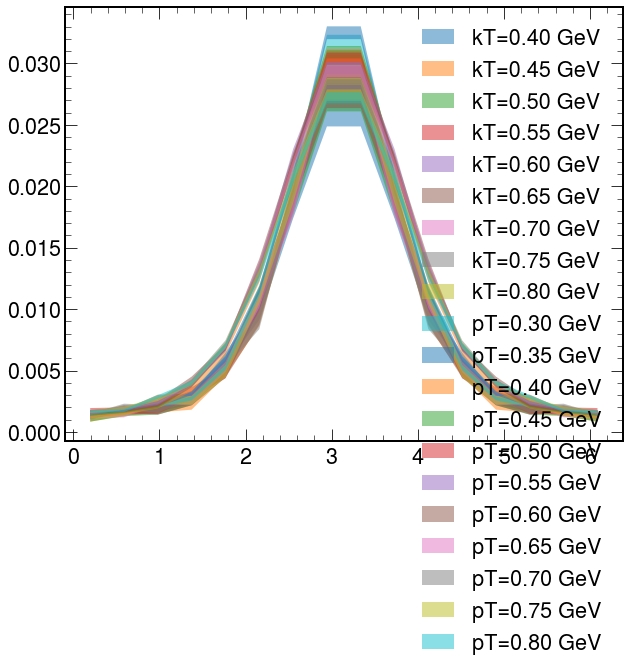

('kT', 0.4) 1.0555225146013005 0.024804063067355997
('kT', 0.45) 1.1463715773705918 0.02455944480539514
('kT', 0.5) 1.1089697959863731 0.02615851818067118
('kT', 0.55) 1.1693484155258036 0.02537523766092588
('kT', 0.6000000000000001) 1.2014956589251107 0.024578371108664458
('kT', 0.65) 1.0820206695423296 0.024939637340857253
('kT', 0.7000000000000001) 1.1208047896678397 0.024092263701060216
('kT', 0.75) 1.1594423357163746 0.025057557949125536
('kT', 0.8) 1.072022592750165 0.02492447271996116
('pT', 0.3) 1.0838749216894439 0.01118260132769006
('pT', 0.35) 1.2020387738123397 0.010520399161223392
('pT', 0.4) 1.259859904715918 0.010314064817936562
('pT', 0.45) 1.3571759264584342 0.010295938332065626
('pT', 0.5) 1.4047151129744486 0.010300877219133414
('pT', 0.55) 1.4377736675741788 0.010151497662817014
('pT', 0.6000000000000001) 1.4494302633646854 0.010290104821516408
('pT', 0.65) 1.4768047776996356 0.010278820460520765
('pT', 0.7) 1.5278361094992796 0.010685529318873522
('pT', 0.75) 1.531

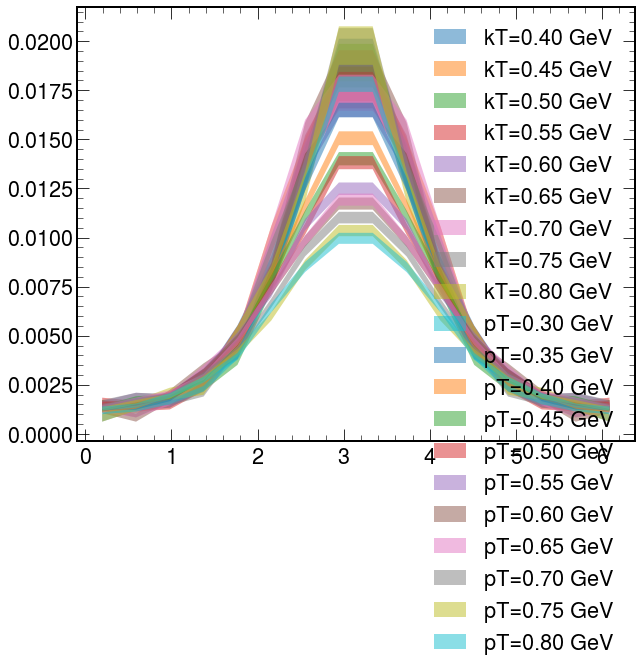

pT1 bins
('kT', 0.4) 1.35352967277681 0.022535463562402595
('kT', 0.45) 1.2594135634076464 0.02277265196685938
('kT', 0.5) 1.3106265111230866 0.02428976149544903
('kT', 0.55) 1.4092425196482399 0.023270734433417394
('kT', 0.6000000000000001) 1.4617111047638744 0.02250993261141923
('kT', 0.65) 1.328686552637596 0.02324796600069602
('kT', 0.7000000000000001) 1.4500646257105403 0.02269431549069988
('kT', 0.75) 1.466499505637756 0.023605914989337742
('kT', 0.8) 1.3304107111122707 0.022745776018648106
('pT', 0.3) 1.3963455821153268 0.010230846033207975
('pT', 0.35) 1.4738101703923658 0.009930871994715125
('pT', 0.4) 1.5073983774797017 0.010026562008988904
('pT', 0.45) 1.6127607476175534 0.010023946193712937
('pT', 0.5) 1.6585178494040935 0.01020613887078534
('pT', 0.55) 1.6868895286988606 0.010337605962875777
('pT', 0.6000000000000001) 1.682992937986241 0.01049918191667457
('pT', 0.65) 1.667740686149913 0.010546033359727274
('pT', 0.7) 1.7353758360177856 0.010955688925693069
('pT', 0.75) 1.

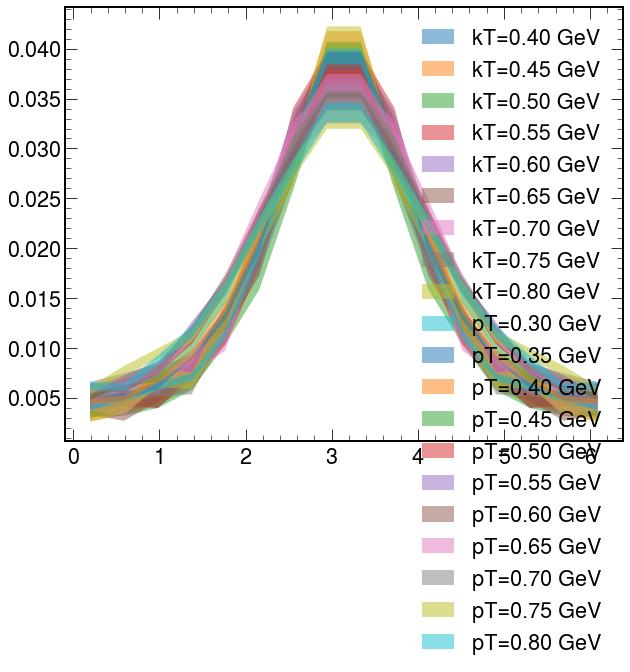

('kT', 0.4) 0.832166597808415 0.027241591861764548
('kT', 0.45) 0.8255301597900334 0.028706867384153133
('kT', 0.5) 0.825756087771167 0.026785768202901003
('kT', 0.55) 0.8766827453400654 0.027554971043862692
('kT', 0.6000000000000001) 0.852072377072844 0.027045303709309243
('kT', 0.65) 0.8221197078187821 0.02770657760805783
('kT', 0.7000000000000001) 0.7564968943664946 0.02658035768562291
('kT', 0.75) 0.8223279296637767 0.02645734046773214
('kT', 0.8) 0.8351876133350985 0.026606220369385574
('pT', 0.3) 0.8135221742543894 0.01132973676497551
('pT', 0.35) 0.8731648776741634 0.010737958800753166
('pT', 0.4) 0.9156494120803791 0.010051888120434347
('pT', 0.45) 0.9600908677835612 0.010036568576857523
('pT', 0.5) 1.015824100632955 0.009869242488482866
('pT', 0.55) 1.0549621336644446 0.009609536126036593
('pT', 0.6000000000000001) 1.0934334600903448 0.009539222449784042
('pT', 0.65) 1.1310400541272838 0.009476430702735881
('pT', 0.7) 1.147512232713121 0.009668300893803664
('pT', 0.75) 1.15343

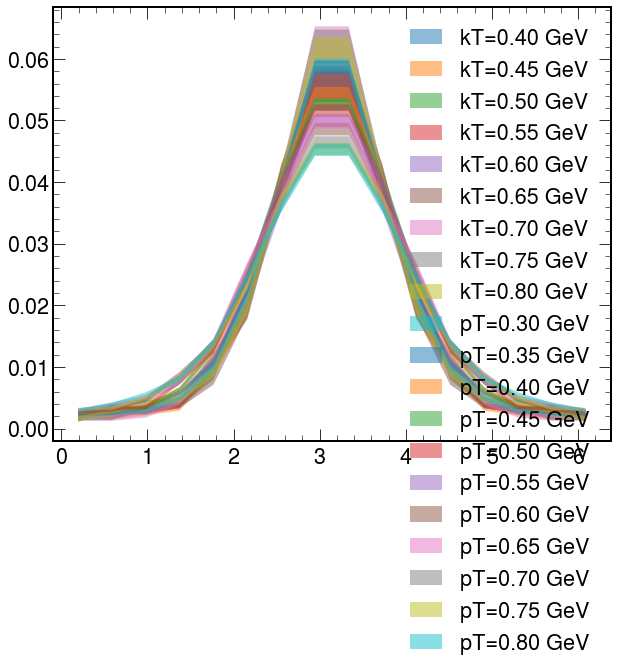

('kT', 0.4) 0.5155076652218528 0.055830921904715565
('kT', 0.45) 0.6265723717947014 0.050853861449105114
('kT', 0.5) 0.5762500633794222 0.04698467548404328
('kT', 0.55) 0.5754146549554506 0.04945891096082765
('kT', 0.6000000000000001) 0.5441572013458336 0.04918177681592
('kT', 0.65) 0.584782708198307 0.05470443210478704
('kT', 0.7000000000000001) 0.5812754872087398 0.04528565458130873
('kT', 0.75) 0.4925070339408896 0.04550857426511163
('kT', 0.8) 0.5851616675108864 0.046981547070720144
('pT', 0.3) 0.5147811315436956 0.018325942498786916
('pT', 0.35) 0.5528411874334095 0.016907758570889636
('pT', 0.4) 0.5503796550590463 0.015489810205286373
('pT', 0.45) 0.5605715502594305 0.014053675364573609
('pT', 0.5) 0.6188193223553436 0.014535565042981579
('pT', 0.55) 0.6283637434728284 0.013808032571571377
('pT', 0.6000000000000001) 0.6600512458393717 0.01335158776047954
('pT', 0.65) 0.6484945099415491 0.012794029076083444
('pT', 0.7) 0.6763972056804204 0.012688031965088439
('pT', 0.75) 0.6952908

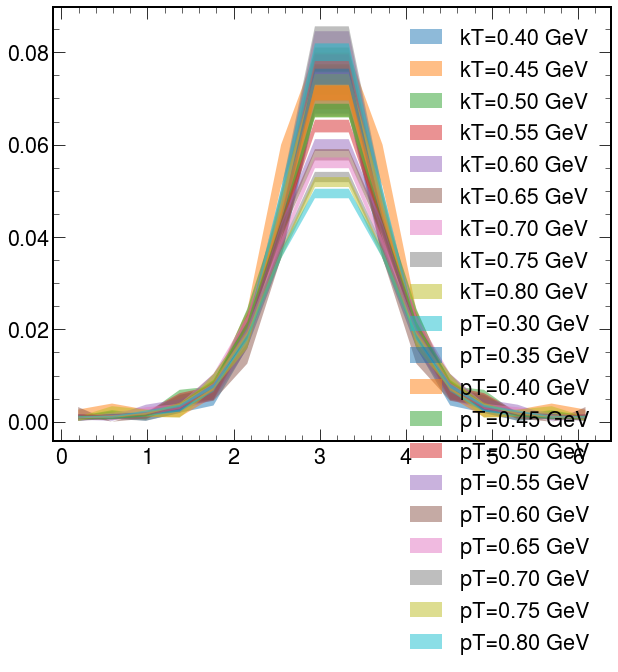

pT2 bins
('kT', 0.4) 1.3507579986040237 0.020522680050362316
('kT', 0.45) 1.2857265645992373 0.020667146566741745
('kT', 0.5) 1.3060809654768202 0.020999555329806557
('kT', 0.55) 1.407654665869748 0.020862523841099847
('kT', 0.6000000000000001) 1.4001060503783689 0.02042680852867525
('kT', 0.65) 1.344205239036772 0.020754301331507376
('kT', 0.7000000000000001) 1.30889211470613 0.020165755337111704
('kT', 0.75) 1.3352925750337856 0.020509295118850718
('kT', 0.8) 1.317868807648428 0.020105006851102624
('pT', 0.3) 1.2813345966705696 0.008596919118969384
('pT', 0.35) 1.326082276367815 0.008439642017650876
('pT', 0.4) 1.3285108897333096 0.00818131964723394
('pT', 0.45) 1.4014568639571965 0.00823193852812542
('pT', 0.5) 1.4610217696853462 0.008312154453544959
('pT', 0.55) 1.4613340764669605 0.008245254652405259
('pT', 0.6000000000000001) 1.4951370178529464 0.008196476695867998
('pT', 0.65) 1.488933724053906 0.00818662023939154
('pT', 0.7) 1.5279308219768393 0.008283673582805514
('pT', 0.75) 

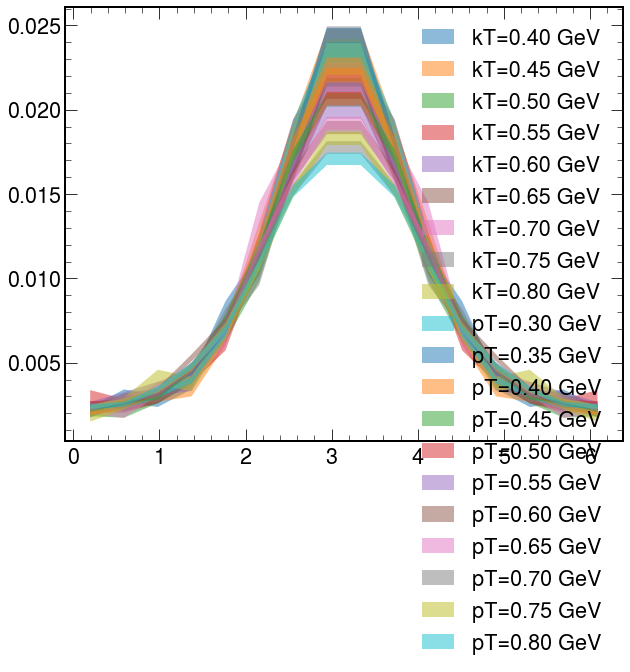

('kT', 0.4) 0.6551248037661329 0.028104941857695874
('kT', 0.45) 0.641689657875153 0.028533716690018994
('kT', 0.5) 0.6428419081921626 0.028827431973238005
('kT', 0.55) 0.6821884034085404 0.02834441616487634
('kT', 0.6000000000000001) 0.7219115539132716 0.027391429404362466
('kT', 0.65) 0.6199427731048567 0.02906360033565922
('kT', 0.7000000000000001) 0.697426018000391 0.02704071723515058
('kT', 0.75) 0.7058821631737587 0.02854701236779942
('kT', 0.8) 0.6566874519706397 0.027430784053226177
('pT', 0.3) 0.6295416821249981 0.01220422087732382
('pT', 0.35) 0.7079244585978183 0.010954988674378474
('pT', 0.4) 0.73790724635689 0.010672304236299241
('pT', 0.45) 0.7896928213512477 0.010252436925520976
('pT', 0.5) 0.8274847456078659 0.010019709622153414
('pT', 0.55) 0.8677094892107199 0.009696430348086028
('pT', 0.6000000000000001) 0.8520620503012537 0.009685560727775263
('pT', 0.65) 0.8758662946377033 0.009674399277496262
('pT', 0.7) 0.8848146794894336 0.010002810652045443
('pT', 0.75) 0.90682

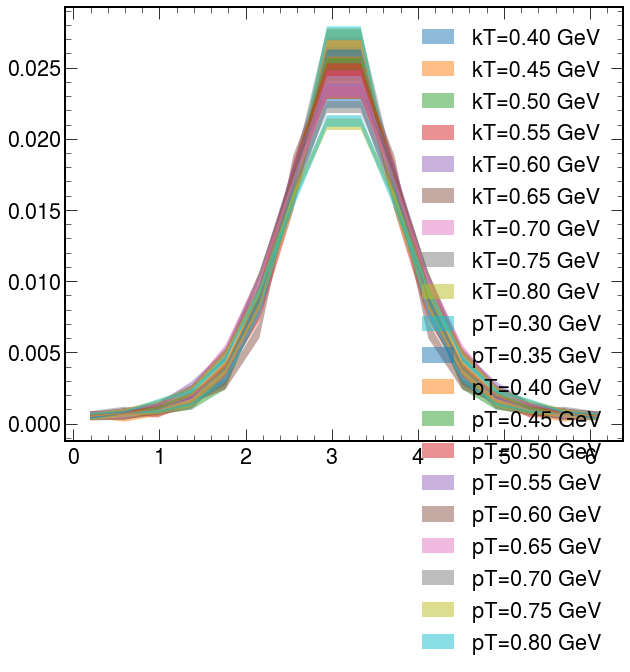

('kT', 0.4) 0.3117296925790501 0.09808824344731676
('kT', 0.45) 0.3033626037108827 0.12872873767433954
('kT', 0.5) 0.33565992605482375 0.07596658858673427
('kT', 0.55) 0.31435639017892786 0.07407706014077298
('kT', 0.6000000000000001) 0.2922111992290986 0.14728505324412317
('kT', 0.65) 0.27048884561735526 0.076112339720702
('kT', 0.7000000000000001) 0.2643644036006078 0.08373827406393447
('kT', 0.75) 0.3045139491957485 0.09366447207745983
('kT', 0.8) 0.2678249258453798 0.08012095376913618
('pT', 0.3) 0.22155503276911767 0.03607777423821603
('pT', 0.35) 0.3190074389578979 0.0405675486928608
('pT', 0.4) 0.3247744453026496 0.039288719475539906
('pT', 0.45) 0.3673486841582787 0.02792268949658335
('pT', 0.5) 0.37076566982482995 0.02778114085304758
('pT', 0.55) 0.3475118872301819 0.027763632988474937
('pT', 0.6000000000000001) 0.3488491427784306 0.02751944405588281
('pT', 0.65) 0.37570896530818865 0.0257993797709092
('pT', 0.7) 0.38559370486132005 0.025844061396163673
('pT', 0.75) 0.36530312

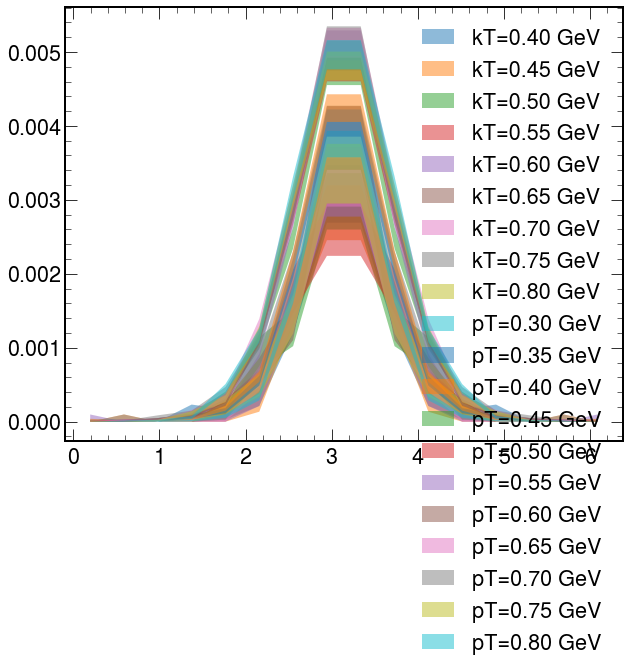

In [210]:
print("dY bins")
all_eHIJING['dY']=[getPrediction(f"{v1}<dy and dy<{v2}") for v1, v2 in [(-0.5, 0.5), (0.5, 1.5), (1.5, 2.5)]]
print("pT1 bins")
all_eHIJING['pT1']=[getPrediction(f"{v1}<pT1 and pT1<{v2}", f"{v1}<pT1 and pT1<{v2}") \
                    for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 1.0)]]
print("pT2 bins")
all_eHIJING['pT2']=[getPrediction(f"{v1}<pT2 and pT2<{v2}") for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 0.8)]]

In [258]:
# import pickle
# with open("eHIJING_results_tweak.pkl", "wb") as f:
#     pickle.dump(all_eHIJING, f, pickle.HIGHEST_PROTOCOL)

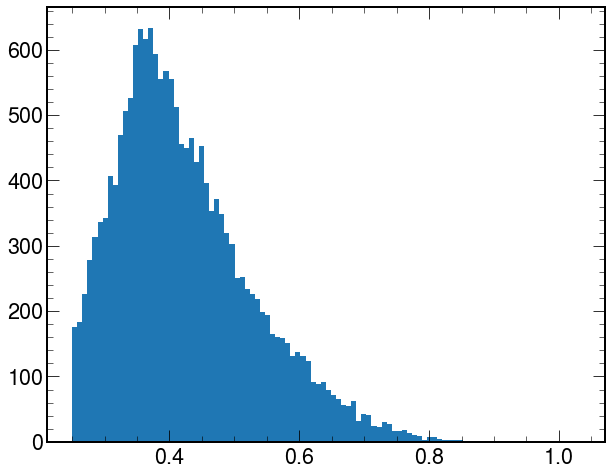

In [220]:
q=f"pT1>0.25 and pT2>0.25 and Q2>1 and nu>2.2 and nu<4.2 and thetalab1>10*{deg} and W>2"
q+=f" and ((thetalab2>25*{deg} and p2>0.7) or (thetalab2>30*{deg} and p2>0.5) or (thetalab2>40*{deg} and p2>0.35))"
q+=f" and z2>0.05 and z2<0.45 and z1>0.5"

plt.hist(events[('pT', 0.65)].query(q).eval(f"pT2"), bins=100)
plt.show()

In [ ]:
plt.hist(